In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv('Admission_Predict.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [3]:
df.dtypes
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.loc[df['Chance of Admit ']<0.8, 'Chance of Admit ']=0
df.loc[df['Chance of Admit ']>=0.8, 'Chance of Admit ']=1

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [5]:
x=df.drop(['Chance of Admit ', 'Serial No.'], axis=1)
y=df['Chance of Admit ']

In [6]:
from sklearn.model_selection import train_test_split


from sklearn import preprocessing
from sklearn import utils


x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [7]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

x_train :  (320, 7)
x_test :  (320,)
y_train :  (80, 7)
y_test :  (80,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree


clf=tree.DecisionTreeClassifier()

clf=clf.fit(x_train, x_test)

y_pred=clf.predict(y_train)

df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [9]:
from sklearn import metrics

print("confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

confusion matrix:

[[50  5]
 [ 2 23]]
1. Accuracy Score: 0.9125
2. Precision Score: 0.8214285714285714
3. Recall Score: 0.92
4. f1 Score: 0.8679245283018867


[Text(0.44, 0.9545454545454546, 'X[5] <= 8.845\ngini = 0.437\nsamples = 320\nvalue = [217, 103]'),
 Text(0.2, 0.8636363636363636, 'X[5] <= 8.63\ngini = 0.098\nsamples = 212\nvalue = [201, 11]'),
 Text(0.12, 0.7727272727272727, 'X[4] <= 1.75\ngini = 0.012\nsamples = 161\nvalue = [160, 1]'),
 Text(0.08, 0.6818181818181818, 'X[5] <= 8.225\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.04, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.12, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.6818181818181818, 'gini = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(0.28, 0.7727272727272727, 'X[6] <= 0.5\ngini = 0.315\nsamples = 51\nvalue = [41, 10]'),
 Text(0.24, 0.6818181818181818, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.32, 0.6818181818181818, 'X[1] <= 105.5\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.28, 0.5909090909090909, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.36, 0.5909090909090909, 'X[5] <=

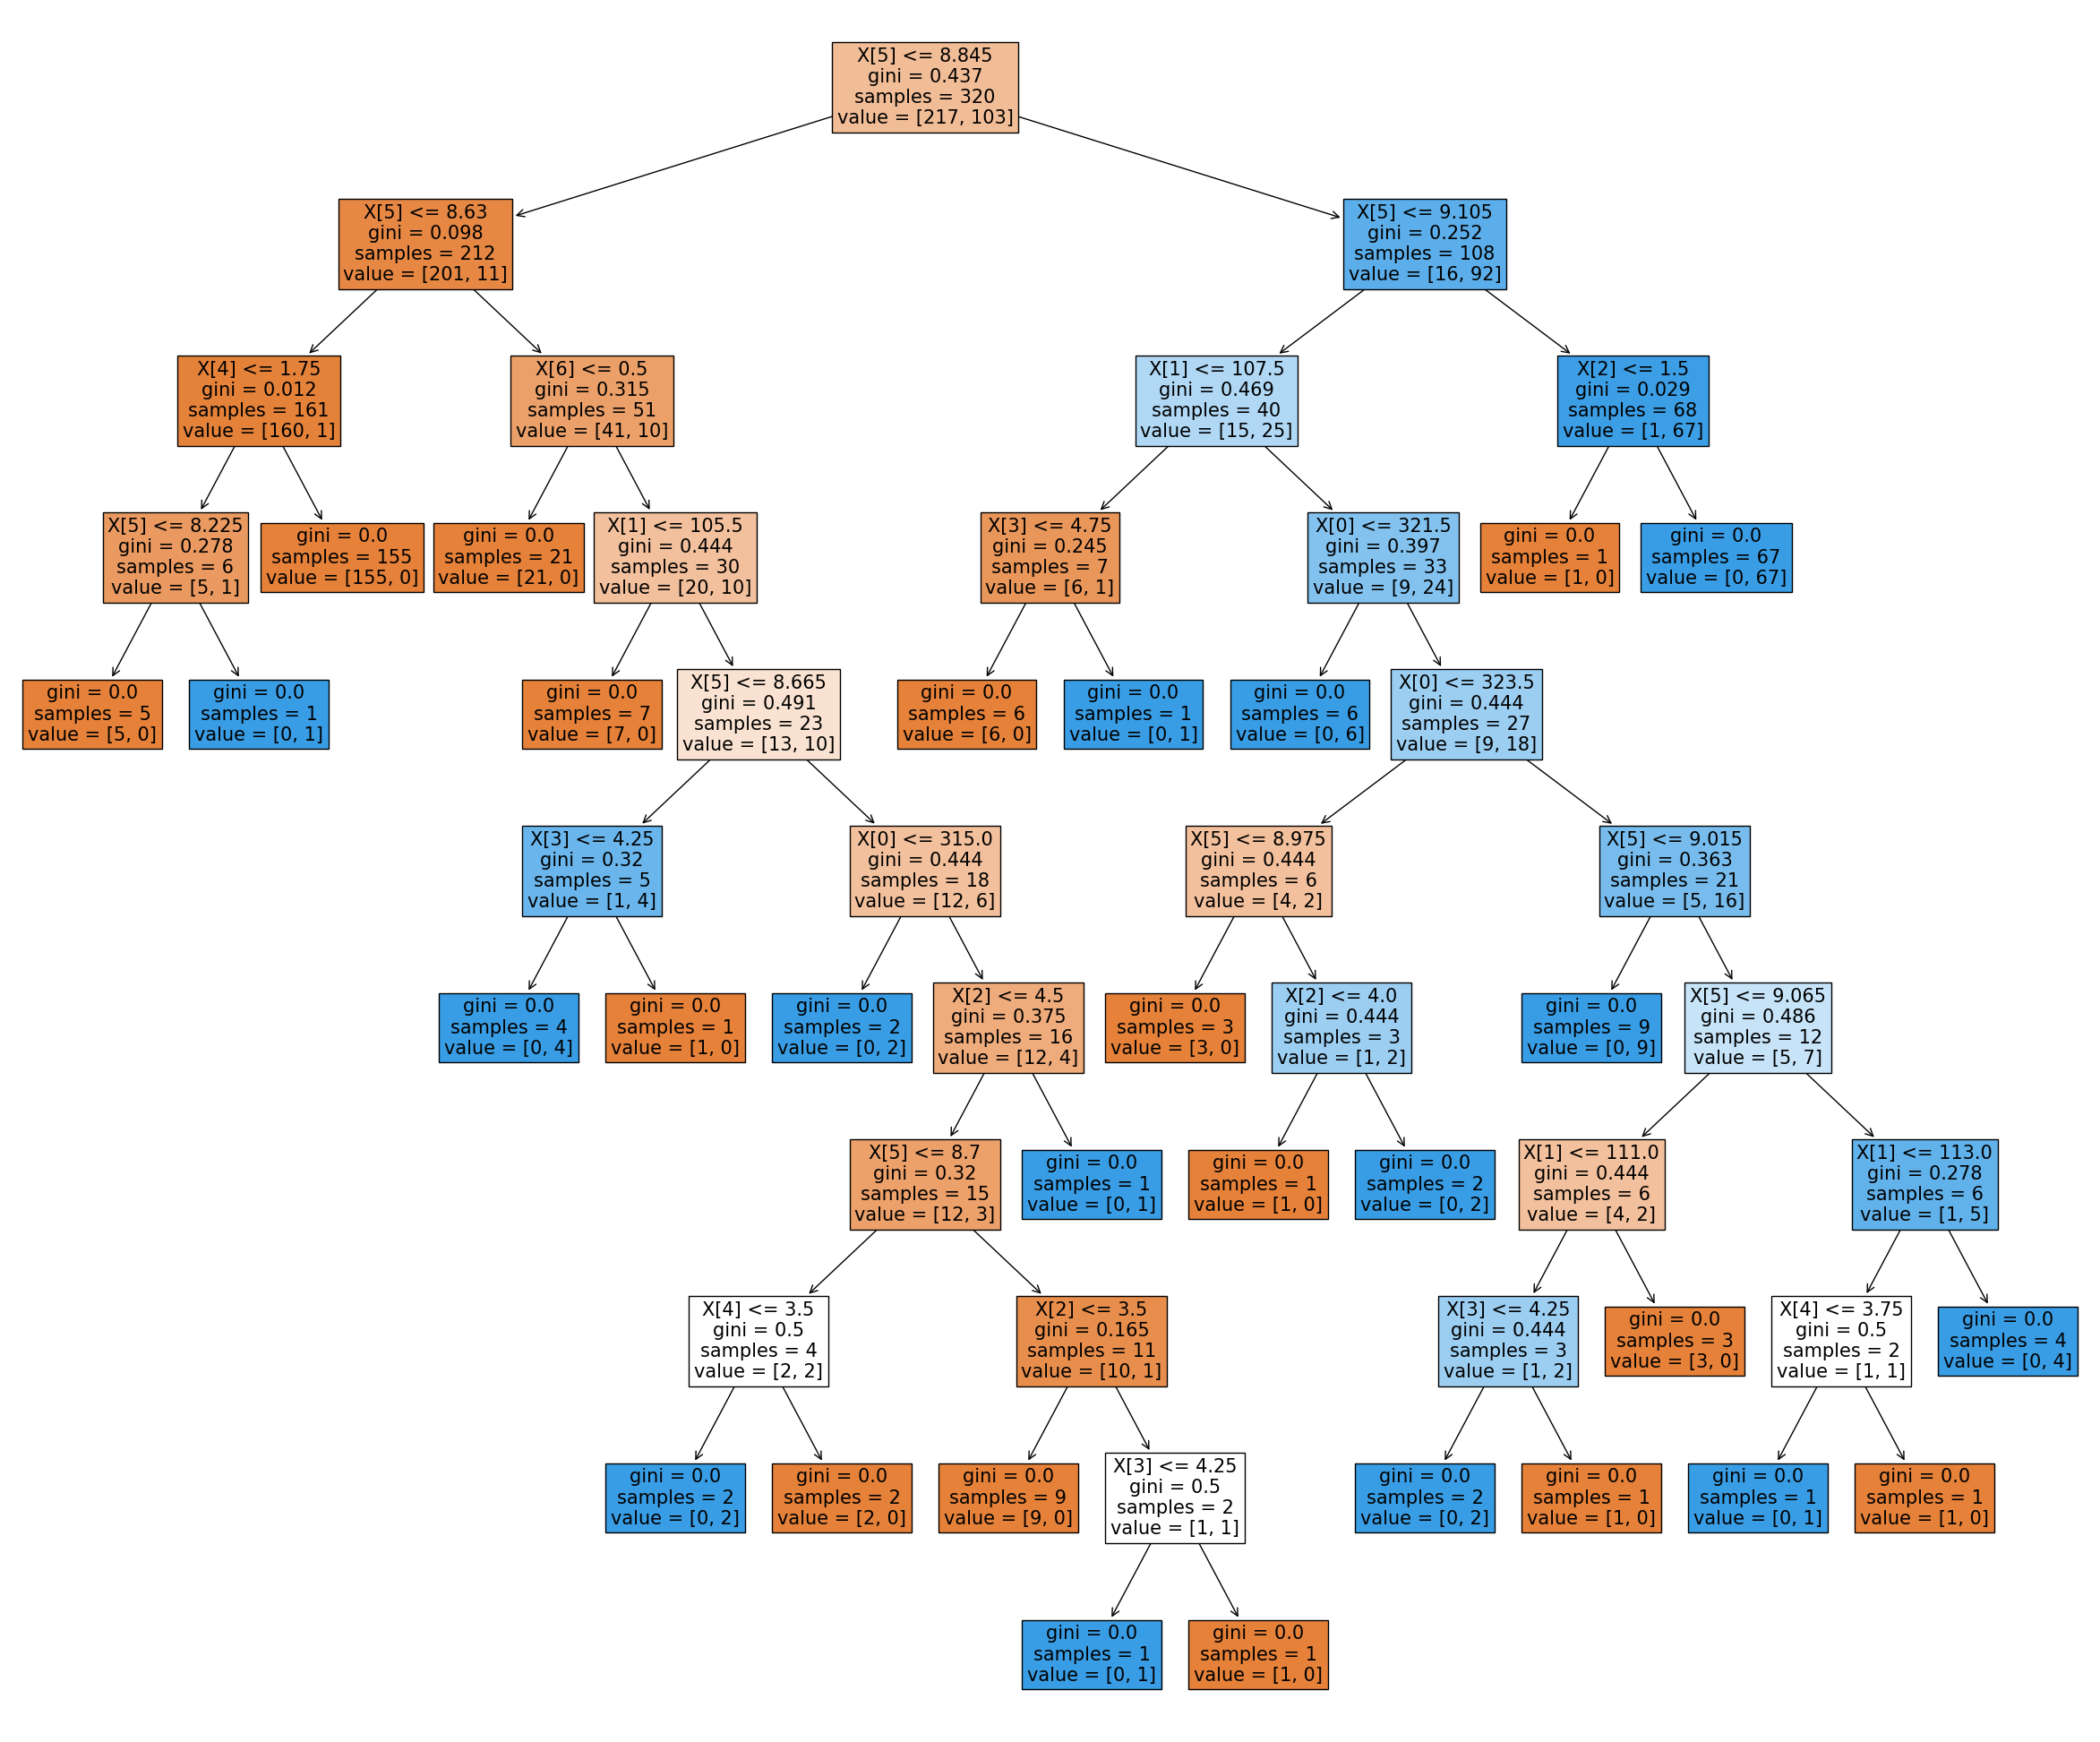

In [10]:
plt.figure(figsize=(30,25))
tree.plot_tree(clf, filled=True, fontsize=15)